In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

In [2]:
# Read dataset file
df = pd.read_csv('STB.csv')
df = df[['Price']]
df = df.dropna()
df

,Price
0,11750
1,12550
2,12900
3,13300
4,13000
...,...
1237,27000
1238,27400
1239,27000
1240,27200


In [3]:
# Split the data into training, testing, and validation sets
train_size = int(0.5 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [4]:
# Normalize the data
mean = train_data.mean()
meant = test_data.mean()
meanv = val_data.mean()
std = train_data.std()
stdt = test_data.std()
stdv = val_data.std()
train_data = (train_data - mean) / std
test_data = (test_data - meant) / stdt
val_data = (val_data - meanv) / stdv

In [5]:
# Prepare the data for CNN
window_size = 10

def create_sequences(data, window_size):
    X = []
    y = []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data.values, window_size)
X_test, y_test = create_sequences(test_data.values, window_size)
X_val, y_val = create_sequences(val_data.values, window_size)


In [6]:
# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(window_size, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [7]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/100
20/20 [==============================] - 2s 19ms/step - loss: 0.4319 - val_loss: 0.1279
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1436 - val_loss: 0.0897
Epoch 3/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1085 - val_loss: 0.0762
Epoch 4/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0927 - val_loss: 0.0937
Epoch 5/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0929 - val_loss: 0.0676
Epoch 6/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0752 - val_loss: 0.0623
Epoch 7/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0694 - val_loss: 0.0577
Epoch 8/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0703 - val_loss: 0.0768
Epoch 9/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0642 - val_loss: 0.0739
Epoch 10/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0617 - val_loss: 0.0536
Epoch 11

20/20 [==============================] - 0s 7ms/step - loss: 0.0335 - val_loss: 0.0504
Epoch 84/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0371 - val_loss: 0.0462
Epoch 85/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0323 - val_loss: 0.0463
Epoch 86/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0338 - val_loss: 0.0473
Epoch 87/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0304 - val_loss: 0.0462
Epoch 88/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0306 - val_loss: 0.0464
Epoch 89/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0335 - val_loss: 0.0514
Epoch 90/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0316 - val_loss: 0.0478
Epoch 91/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0319 - val_loss: 0.0459
Epoch 92/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0303 - val_loss: 0.0476
Epoch 93/100


In [8]:
# Make predictions
y_pred = model.predict(X_test)
# Inverse transform the predictions
y_pred = y_pred * pd.Series(stdt).values[0] + pd.Series(meant).values[0]

12/12 [==============================] - 0s 3ms/step


In [9]:
# Make predictions
y_vpred = model.predict(X_val)
# Inverse transform the predictions
y_vpred = y_vpred * pd.Series(stdv).values[0] + pd.Series(meanv).values[0]

8/8 [==============================] - 0s 2ms/step


In [10]:
df

,Price
0,11750
1,12550
2,12900
3,13300
4,13000
...,...
1237,27000
1238,27400
1239,27000
1240,27200


In [11]:
train_size = int(0.5 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]
# re make predictions on the testing set
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
# re make predictions on the validate set
x_val = np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]
# calculate the RMSE
valid_rmse = np.sqrt(np.mean((y_vpred - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# calculate the MAPE
valid_mape = np.mean(np.abs((y_val - y_vpred) / y_val)) * 100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Validation MAPE:", valid_mape)
print("Testing MAPE:", test_mape)

# calculate the MAE
valid_mae = np.mean(np.abs(y_vpred - y_val))
test_mae = np.mean(np.abs(y_pred - y_test))
print("Validation MAE:", valid_mae)
print("Testing MAE:", test_mae)

Validation RMSE: 4596.05295708311
Testing RMSE: 7862.802524856794
Validation MAPE: 16.9434791334817
Testing MAPE: 26.98911589620705
Validation MAE: 3582.787474230079
Testing MAE: 6288.426824021848


In [12]:
y_val

array([20350, 21750, 22750, 22400, 22250, 22800, 22350, 22250, 21550,
       21150, 20500, 20200, 21600, 22300, 21900, 20600, 20900, 20700,
       21000, 20250, 18850, 19200, 20500, 21300, 21200, 21500, 22550,
       22600, 21500, 22000, 22350, 23050, 22500, 22600, 22500, 22050,
       22600, 23050, 23300, 23000, 22550, 22950, 23050, 23100, 23000,
       22850, 22950, 23050, 24450, 24700, 25200, 24950, 25450, 25200,
       25250, 25300, 25250, 24900, 25200, 25650, 25650, 25550, 25400,
       25200, 25100, 24700, 25000, 25400, 25650, 25100, 24850, 24650,
       24800, 24700, 24700, 24350, 23900, 23750, 23100, 23050, 23050,
       23050, 22450, 21600, 22150, 21750, 21950, 21450, 20500, 20500,
       20300, 19700, 20600, 19200, 18750, 19250, 18000, 16750, 17000,
       15850, 16950, 17650, 17650, 18150, 17700, 17300, 17150, 15950,
       14850, 14900, 15000, 16050, 16150, 16150, 16900, 16900, 17250,
       16600, 15500, 16450, 16250, 15150, 15600, 15850, 15100, 16150,
       17200, 17100,

In [13]:
y_vpred

array([[21209.498],
       [20601.414],
       [20133.082],
       [21595.16 ],
       [22580.508],
       [22377.96 ],
       [21049.996],
       [20992.148],
       [21142.537],
       [21072.568],
       [20980.264],
       [19003.377],
       [18358.266],
       [20503.7  ],
       [21347.8  ],
       [21848.863],
       [21541.926],
       [22083.727],
       [22402.467],
       [21899.943],
       [21785.682],
       [22642.473],
       [22691.404],
       [23029.164],
       [22561.674],
       [22434.303],
       [21812.463],
       [22470.377],
       [23262.275],
       [23348.936],
       [23400.633],
       [22844.244],
       [22887.62 ],
       [22891.662],
       [23017.627],
       [23089.186],
       [22860.902],
       [22832.762],
       [22928.303],
       [24305.25 ],
       [24888.61 ],
       [25560.217],
       [25434.668],
       [25607.254],
       [25670.754],
       [25261.736],
       [25524.633],
       [25110.854],
       [24957.814],
       [25199.56 ],


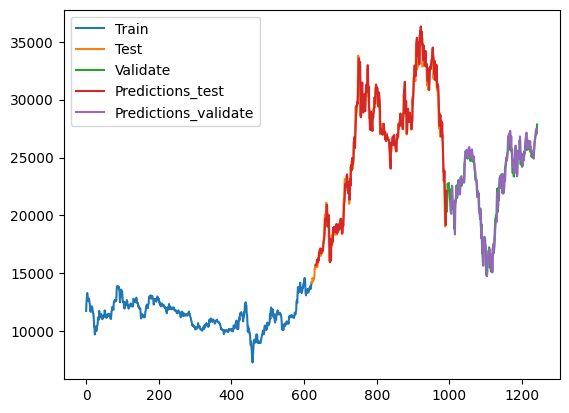

In [14]:
# ploting the actual values and predicted values
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index[-len(y_pred):], y_pred)
plt.plot(val_data.index[-len(y_vpred):], y_vpred)
plt.legend(['Train', 'Test','Validate', 'Predictions_test','Predictions_validate'])
plt.show()

In [15]:
y_val

array([20350, 21750, 22750, 22400, 22250, 22800, 22350, 22250, 21550,
       21150, 20500, 20200, 21600, 22300, 21900, 20600, 20900, 20700,
       21000, 20250, 18850, 19200, 20500, 21300, 21200, 21500, 22550,
       22600, 21500, 22000, 22350, 23050, 22500, 22600, 22500, 22050,
       22600, 23050, 23300, 23000, 22550, 22950, 23050, 23100, 23000,
       22850, 22950, 23050, 24450, 24700, 25200, 24950, 25450, 25200,
       25250, 25300, 25250, 24900, 25200, 25650, 25650, 25550, 25400,
       25200, 25100, 24700, 25000, 25400, 25650, 25100, 24850, 24650,
       24800, 24700, 24700, 24350, 23900, 23750, 23100, 23050, 23050,
       23050, 22450, 21600, 22150, 21750, 21950, 21450, 20500, 20500,
       20300, 19700, 20600, 19200, 18750, 19250, 18000, 16750, 17000,
       15850, 16950, 17650, 17650, 18150, 17700, 17300, 17150, 15950,
       14850, 14900, 15000, 16050, 16150, 16150, 16900, 16900, 17250,
       16600, 15500, 16450, 16250, 15150, 15600, 15850, 15100, 16150,
       17200, 17100,

In [16]:
y_vpred

array([[21209.498],
       [20601.414],
       [20133.082],
       [21595.16 ],
       [22580.508],
       [22377.96 ],
       [21049.996],
       [20992.148],
       [21142.537],
       [21072.568],
       [20980.264],
       [19003.377],
       [18358.266],
       [20503.7  ],
       [21347.8  ],
       [21848.863],
       [21541.926],
       [22083.727],
       [22402.467],
       [21899.943],
       [21785.682],
       [22642.473],
       [22691.404],
       [23029.164],
       [22561.674],
       [22434.303],
       [21812.463],
       [22470.377],
       [23262.275],
       [23348.936],
       [23400.633],
       [22844.244],
       [22887.62 ],
       [22891.662],
       [23017.627],
       [23089.186],
       [22860.902],
       [22832.762],
       [22928.303],
       [24305.25 ],
       [24888.61 ],
       [25560.217],
       [25434.668],
       [25607.254],
       [25670.754],
       [25261.736],
       [25524.633],
       [25110.854],
       [24957.814],
       [25199.56 ],
